### Ideas

- climate and changes
    - temperature
    - precipitation
    - humidity
- coffee production quantity
- coffee price
    - retail
    - profit for growers
- people employed in coffee growing industry
    - in efforts to keep costs down, what practices might farms use?
        - child labor (https://humantraffickingsearch.org/there-could-be-labor-exploitation-in-your-coffee-cup-heres-how-it-got-there/)
- consumption habits / demand
    - how much coffee people are drinking 
    
1990-2020 ()

TO-DO:
* convert prod_df rows and column switch
* get export prices per year for top 10 countries

We have: 
- production 
    - by top countries
    - global
- us retail price
- change in temp annual
- change in temp from mean

we need:
- export price per country
    - globally
- us demand

Look at: 
coffee quality over time
coffee production losses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Production

In [2]:
prod_df = pd.read_csv('data/production.csv')
prod_df.shape

(56, 32)

In [3]:
prod_df.isnull().sum()

Unnamed: 0    0
Crop year     0
1990/91       0
1991/92       0
1992/93       0
1993/94       0
1994/95       0
1995/96       0
1996/97       0
1997/98       0
1998/99       0
1999/00       0
2000/01       0
2001/02       0
2002/03       0
2003/04       0
2004/05       0
2005/06       0
2006/07       0
2007/08       0
2008/09       0
2009/10       0
2010/11       0
2011/12       0
2012/13       0
2013/14       0
2014/15       0
2015/16       0
2016/17       0
2017/18       0
2018/19       0
2019/20       0
dtype: int64

### Global Warming

In [4]:
global_warming_df = pd.read_csv('data/FAOSTAT_data_1-10-2022.csv')
global_warming_df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


In [5]:
# global_warming_df[
global_warming_df[global_warming_df['Area'] == 'United States of America']

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
216138,ET,Temperature change,231,United States of America,7271,Temperature change,7001,January,1961,1961,?C,0.948,Fc,Calculated data
216139,ET,Temperature change,231,United States of America,7271,Temperature change,7001,January,1962,1962,?C,-0.765,Fc,Calculated data
216140,ET,Temperature change,231,United States of America,7271,Temperature change,7001,January,1963,1963,?C,-1.168,Fc,Calculated data
216141,ET,Temperature change,231,United States of America,7271,Temperature change,7001,January,1964,1964,?C,0.906,Fc,Calculated data
216142,ET,Temperature change,231,United States of America,7271,Temperature change,7001,January,1965,1965,?C,0.751,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217153,ET,Temperature change,231,United States of America,7271,Temperature change,7020,Meteorological year,2016,2016,?C,2.229,Fc,Calculated data
217154,ET,Temperature change,231,United States of America,7271,Temperature change,7020,Meteorological year,2017,2017,?C,1.437,Fc,Calculated data
217155,ET,Temperature change,231,United States of America,7271,Temperature change,7020,Meteorological year,2018,2018,?C,1.278,Fc,Calculated data
217156,ET,Temperature change,231,United States of America,7271,Temperature change,7020,Meteorological year,2019,2019,?C,1.040,Fc,Calculated data


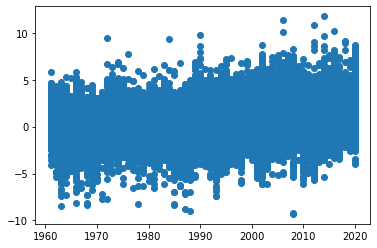

In [6]:
# fig, ax = 
plt.scatter(global_warming_df['Year'], global_warming_df['Value']);

### Retail Prices:

In [7]:
retail_prices = pd.read_excel('data/3b - retail_prices.xlsx')

In [8]:
# cleaning column names by snakecasing and strpping blankspace
retail_prices.columns = [col.lower().strip().replace(' ','_') 
                         for col in retail_prices.columns]
# shortening usa name
retail_prices.rename(columns={'united_states_of_america':'usa'},inplace=True)

In [9]:
retail_prices.head()

,year,austria,belgium,bulgaria,cyprus,czechia,denmark,finland,france,germany,...,slovakia,slovenia,spain,sweden,japan,norway,russian_federation,switzerland,united_kingdom_1,usa
0,1990,4.90,3.27,NaN,2.83,NaN,3.81,2.98,3.73,3.99,...,NaN,NaN,3.62,3.43,10.26,3.31,NaN,4.83,10.55,2.97
1,1991,4.57,2.92,NaN,2.80,NaN,3.67,2.72,3.43,3.84,...,NaN,NaN,3.50,3.29,11.88,3.16,NaN,4.36,10.41,2.81
2,1992,4.99,3.05,NaN,2.87,NaN,3.79,2.46,2.31,4.00,...,NaN,NaN,3.50,3.11,12.62,3.12,NaN,4.52,10.09,2.58
3,1993,4.97,2.78,NaN,2.60,NaN,3.48,1.94,2.03,3.62,...,NaN,NaN,2.79,2.65,14.57,2.46,NaN,4.27,8.44,2.47
4,1994,4.58,3.42,NaN,3.18,NaN,4.45,2.73,2.40,4.18,...,NaN,NaN,2.76,3.79,14.69,3.29,NaN,4.50,11.36,3.40


In [10]:
us_retail_price = retail_prices[['year', 'usa']].copy()
us_retail_price.head()

,year,usa
0,1990,2.97
1,1991,2.81
2,1992,2.58
3,1993,2.47
4,1994,3.40


In [11]:
us_retail_price.rename(columns={'year': 'Date'}, inplace=True)
us_retail_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    30 non-null     int64  
 1   usa     29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


### US Coffee Consumption

In [12]:
us_consumption = pd.read_excel('data/us_coffee_consumption.xlsx')
us_consumption.head(3)

,Coffee Consumption in the US,Unnamed: 1
0,NaN,NaN
1,Date,Thousand Units (Bags of 60 kg)
2,2019,26865.659


In [13]:
# modifying rows to be correct values (removing incorrect info and fixing column names)
us_consumption.drop([0, 1, 32, 33, 34, 35], inplace=True)
us_consumption.columns = ('Date', 'Thousand Units (Bags of 60 kg)')
us_consumption.head()

,Date,Thousand Units (Bags of 60 kg)
2,2019,26865.659
3,2018,26514.328
4,2017,26183
5,2016,25243
6,2015,24438


In [14]:
us_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 2 to 31
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            30 non-null     object
 1   Thousand Units (Bags of 60 kg)  30 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [15]:
# Changing quantity to numeric type
us_consumption['Thousand Units (Bags of 60 kg)'] = pd.to_numeric(us_consumption['Thousand Units (Bags of 60 kg)'])
us_consumption['Date'] = pd.to_numeric(us_consumption['Date'])
us_consumption.describe()

,Date,Thousand Units (Bags of 60 kg)
count,30.000000,30.000000
mean,2004.500000,20994.526633
std,8.803408,2801.853434
min,1990.000000,17326.104000
25%,1997.250000,18682.276000
50%,2004.500000,20820.071500
75%,2011.750000,22184.720750
max,2019.000000,26865.659000


### Green Coffee Net Production Brazil

In [16]:
brazil_grn_coffee = pd.read_excel('data/Brazil/Green Coffee Net Production in Brazil.xlsx')
brazil_grn_coffee.head(3)

,Green Coffee Net Production in Brazil,Unnamed: 1
0,NaN,NaN
1,Date,Thousand US Dollars PPP = 2004–2006
2,2019,3298065.51618


In [17]:
# modifying rows to be correct values (removing incorrect info and fixing column names)
brazil_grn_coffee.drop([0, 1, 61, 62, 63, 64], inplace=True)
brazil_grn_coffee.columns = ('Date', 'Thousand US Dollars PPP = 2004–2006')
brazil_grn_coffee.head()

,Date,Thousand US Dollars PPP = 2004–2006
2,2019,3298065.51618
3,2018,3252619.81583
4,2017,3206246.65221
5,2016,3243547.63236
6,2015,2844372.39744


In [18]:
brazil_grn_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 2 to 60
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Date                                 59 non-null     object
 1   Thousand US Dollars PPP = 2004–2006  59 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [19]:
# Changing quantity to numeric type
brazil_grn_coffee['Thousand US Dollars PPP = 2004–2006'] = pd.to_numeric(brazil_grn_coffee['Thousand US Dollars PPP = 2004–2006'])
brazil_grn_coffee['Date'] = pd.to_numeric(brazil_grn_coffee['Date'])
brazil_grn_coffee.describe()

,Date,Thousand US Dollars PPP = 2004–2006
count,59.000000,5.900000e+01
mean,1990.000000,1.948644e+06
std,17.175564,7.589486e+05
min,1961.000000,4.039432e+05
25%,1975.500000,1.376394e+06
50%,1990.000000,1.753197e+06
75%,2004.500000,2.543065e+06
max,2019.000000,3.298066e+06


### Brazil Temp

In [37]:
brazil_temp = pd.read_csv('data/Brazil/observed-average-annual-mean-temperature-of-brazil-for-1901-2021.csv')
brazil_temp.drop(columns='5-yr smooth', inplace=True)
brazil_temp.head()

,Category,Annual Mean
0,1901,24.91
1,1902,25.04
2,1903,24.87
3,1904,24.66
4,1905,24.84


In [38]:
# Renaming category column to 'date':
brazil_temp.rename(columns={'Category': 'Date'}, inplace=True)
brazil_temp.head(3)

,Date,Annual Mean
0,1901,24.91
1,1902,25.04
2,1903,24.87


### Brazil production

In [39]:
brazil_prod = pd.read_csv('data/Brazil/brazil_FAOSTAT_production.csv')
brazil_prod.head(3)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,656,"Coffee, green",1990,1990,ha,2908960,NaN,Official data
1,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,656,"Coffee, green",1991,1991,ha,2763440,NaN,Official data
2,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,656,"Coffee, green",1992,1992,ha,2500320,NaN,Official data


In [40]:
brazil_prod.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Item Code (FAO)', 'Year Code', 'Flag'], inplace=True)
brazil_prod.head(3)

,Area,Element Code,Element,Item,Year,Unit,Value,Flag Description
0,Brazil,5312,Area harvested,"Coffee, green",1990,ha,2908960,Official data
1,Brazil,5312,Area harvested,"Coffee, green",1991,ha,2763440,Official data
2,Brazil,5312,Area harvested,"Coffee, green",1992,ha,2500320,Official data


In [41]:
brazil_prod.Element.unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [42]:
area_harvested = brazil_prod[brazil_prod['Element'] == 'Area harvested'].copy()
area_harvested.drop(columns=['Area', 'Element Code', 'Element', 'Item', 'Flag Description', 'Unit'], inplace=True)
area_harvested.columns = ['Date', 'hectares_harvested']
area_harvested.head()

,Date,hectares_harvested
0,1990,2908960
1,1991,2763440
2,1992,2500320
3,1993,2259330
4,1994,2097650


In [43]:
yields = brazil_prod[brazil_prod['Element'] == 'Yield'].copy()
yields.drop(columns=['Area', 'Element Code', 'Element', 'Item', 'Flag Description', 'Unit'], inplace=True)
yields.columns = ['Date', 'hectograms_per_hectare_yield']
yields.head()

,Date,hectograms_per_hectare_yield
31,1990,5036
32,1991,5502
33,1992,5177
34,1993,5660
35,1994,6232


In [44]:
brazil_production = brazil_prod[brazil_prod['Element'] == 'Production'].copy()
brazil_production.drop(columns=['Area', 'Element Code', 'Element', 'Item', 'Flag Description', 'Unit'], inplace=True)
brazil_production.columns = ['Date', 'tonnes_produced']
brazil_production.head()

,Date,tonnes_produced
62,1990,1464856
63,1991,1520382
64,1992,1294373
65,1993,1278759
66,1994,1307289


## Merging:

In [45]:
retail_consumption = pd.merge(us_retail_price, us_consumption, on='Date')
retail_consumption.head()

,Date,usa,Thousand Units (Bags of 60 kg)
0,1990,2.97,18297.617
1,1991,2.81,18661.180
2,1992,2.58,18290.453
3,1993,2.47,19217.137
4,1994,3.40,17326.104


In [46]:
retail_consump_grn = pd.merge(retail_consumption, brazil_grn_coffee, on='Date')
retail_consump_grn.head()

,Date,usa,Thousand Units (Bags of 60 kg),Thousand US Dollars PPP = 2004–2006
0,1990,2.97,18297.617,1.573783e+06
1,1991,2.81,18661.180,1.633438e+06
2,1992,2.58,18290.453,1.390623e+06
3,1993,2.47,19217.137,1.373848e+06
4,1994,3.40,17326.104,1.404499e+06


In [47]:
all_four = pd.merge(retail_consump_grn, brazil_temp, on='Date')
all_four.head()

,Date,usa,Thousand Units (Bags of 60 kg),Thousand US Dollars PPP = 2004–2006,Annual Mean
0,1990,2.97,18297.617,1.573783e+06,25.12
1,1991,2.81,18661.180,1.633438e+06,25.05
2,1992,2.58,18290.453,1.390623e+06,24.91
3,1993,2.47,19217.137,1.373848e+06,25.02
4,1994,3.40,17326.104,1.404499e+06,25.14


In [48]:
first = pd.merge(area_harvested, yields, on='Date')
first.head(2)

,Date,hectares_harvested,hectograms_per_hectare_yield
0,1990,2908960,5036
1,1991,2763440,5502


In [49]:
second = pd.merge(first, brazil_production, on='Date')
second.head(2)

,Date,hectares_harvested,hectograms_per_hectare_yield,tonnes_produced
0,1990,2908960,5036,1464856
1,1991,2763440,5502,1520382


In [50]:
brazil_df = pd.merge(second, all_four, on='Date')
brazil_df.head()

,Date,hectares_harvested,hectograms_per_hectare_yield,tonnes_produced,usa,Thousand Units (Bags of 60 kg),Thousand US Dollars PPP = 2004–2006,Annual Mean
0,1990,2908960,5036,1464856,2.97,18297.617,1.573783e+06,25.12
1,1991,2763440,5502,1520382,2.81,18661.180,1.633438e+06,25.05
2,1992,2500320,5177,1294373,2.58,18290.453,1.390623e+06,24.91
3,1993,2259330,5660,1278759,2.47,19217.137,1.373848e+06,25.02
4,1994,2097650,6232,1307289,3.40,17326.104,1.404499e+06,25.14


In [51]:
brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 30 non-null     int64  
 1   hectares_harvested                   30 non-null     int64  
 2   hectograms_per_hectare_yield         30 non-null     int64  
 3   tonnes_produced                      30 non-null     int64  
 4   usa                                  29 non-null     float64
 5   Thousand Units (Bags of 60 kg)       30 non-null     float64
 6   Thousand US Dollars PPP = 2004–2006  30 non-null     float64
 7   Annual Mean                          30 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 2.1 KB


In [52]:
brazil_df.rename(columns={'usa':'us_retail_price'}, inplace=True)

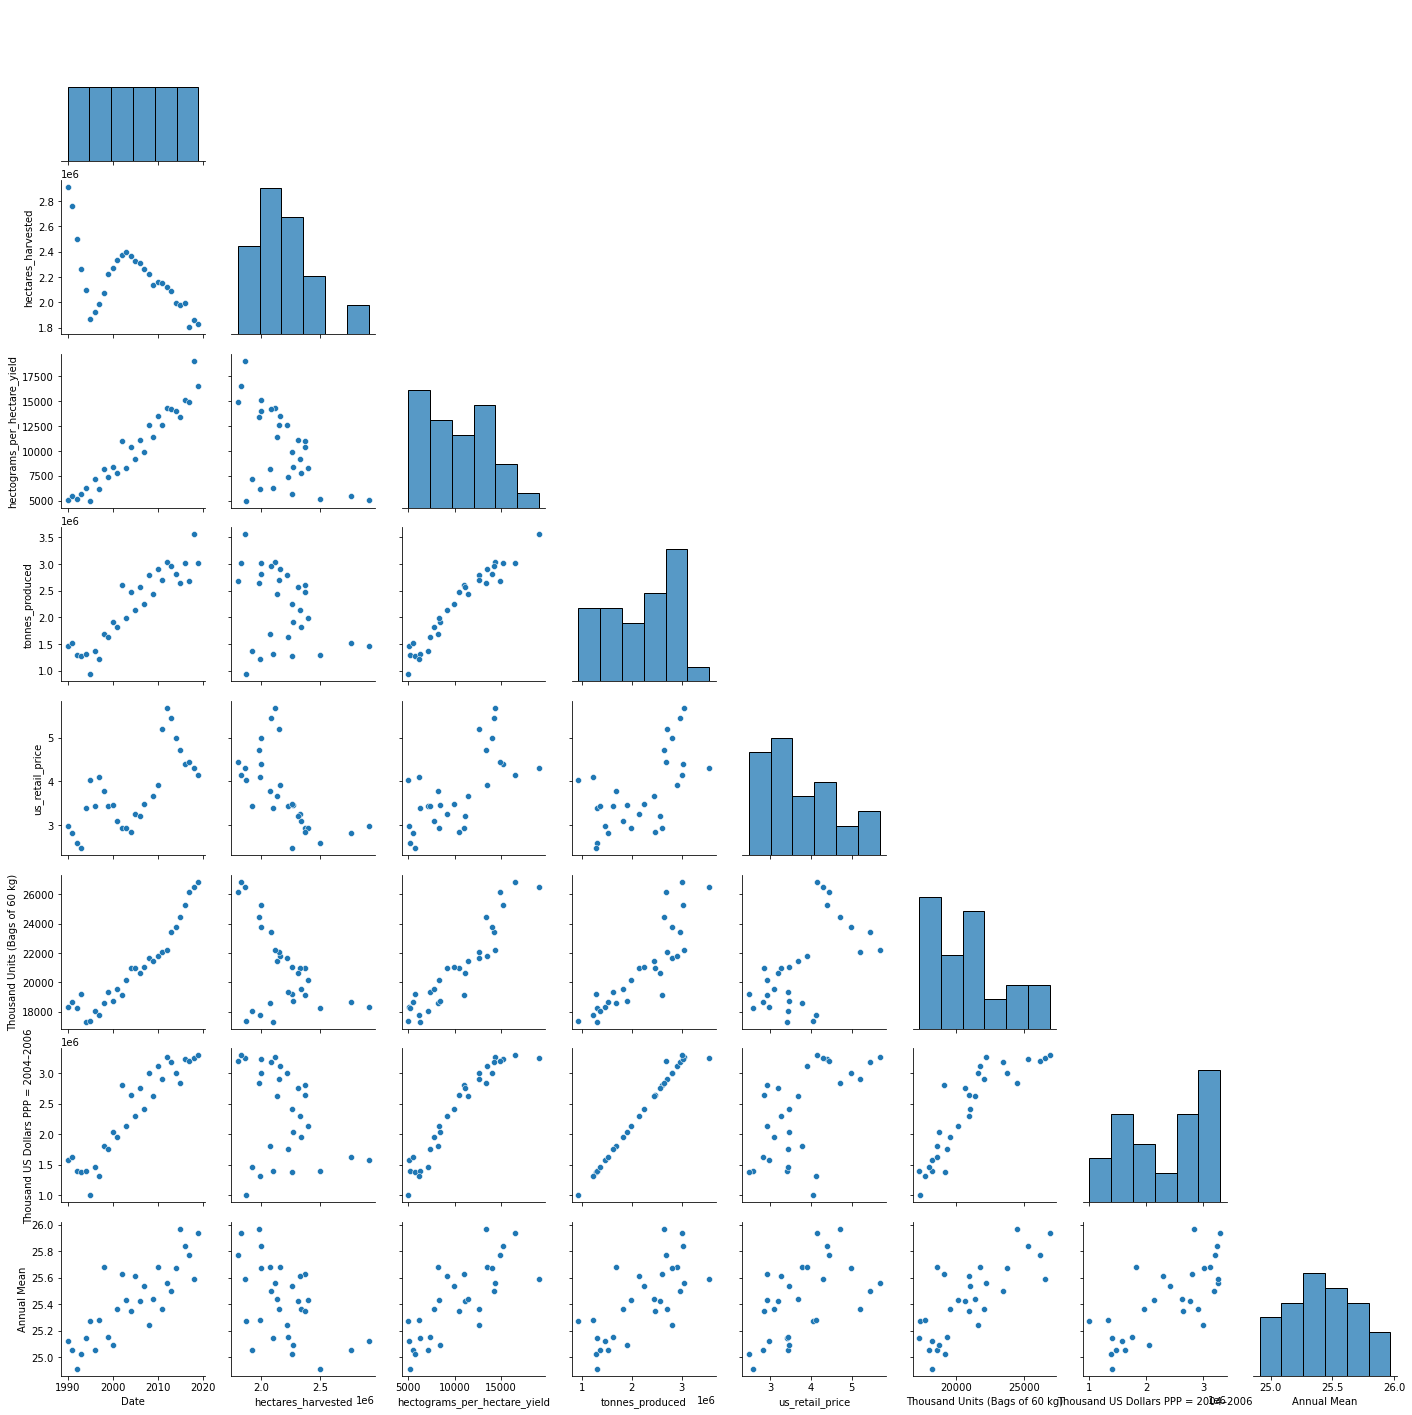

In [53]:
sns.pairplot(brazil_df, corner=True);

SOURCES:

us_coffee_consumption - https://www.nationmaster.com/nmx/ranking/coffee-consumption

brazil green coffee net production - https://www.nationmaster.com/nmx/timeseries/brazil-green-coffee-net-production

brazil weather - https://climateknowledgeportal.worldbank.org/country/brazil/climate-data-historical

brazil production more detailed - https://www.fao.org/faostat/en/#data/QCL
